# Activation Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("talk")
sns.set_style("darkgrid")

## Meaning of the Term *Activation Function*

> *An __activation function__ introduce non-linearity into a neural network. Without an activation function (also called a __non-linearity__), all layers in a neural network would consist only of two linear operations - a dot product and an addition:*
> $$ w^T x + b $$
> *It follows that these layers would be restricted to learning linear transformations (affine transformations) of the input data, that is, the hypothesis space of the layer would consist solely the set of all possible linear transformations of the input data into a $N$-dimensional space (given the layer comprises of $N$ units). Such a hypothesis space is far too restrictive and defeats the purpose of having multiple layers of representations, because, no matter how deeply we stack these layers, the overall result would still be a linear operation. That is, adding more layers wouldn’t extend the hypothesis space of the network, and it would just be a linear model. Applying an activation function to the output of a neuron allows a chain of dense layers to implement complex, non-linear geometric transformations. This results in deep neural networks having very rich hypothesis spaces.*

## Common Activation Functions

In [2]:
z = np.arange(-10, 10, 0.01)

### *Sigmoid Function* 

In [3]:
def sigmoid(z, derivative=False):
    f = 1 / (1 + np.exp(-z))
    if (derivative == True):
        return f * (1 - f)
    return f

> *The **sigmoid function** transforms its inputs, for which values lie in the domain $\mathbb{R}$, to outputs that lie on the interval $(0, 1)$, that is, it accepts any input in the range $(-\infty, \infty)$ and squashes it down to some value in the range $(0, 1)$:*
> $$ \large{\sigma(z) = \dfrac{1}{1+ e^{-z}}} $$

> *The derivative of the sigmoid function is given by:*
> $$ \large{\dfrac{d}{dz}[\sigma(z)] = \dfrac{e^{-z}}{(1+ e^{-z})^2}} = \sigma(z)[1 - \sigma(z)]$$

The sigmoid function is widely used as an activation functions on output units when these outputs are being interpreted as probabilities for a binary classification problem. However, the sigmoid function has largely been replaced by the simpler and more easily trainable Rectified Linear Unit (ReLU) function for use in hidden layers.

*The sigmoid function and its derivative are plotted below.*

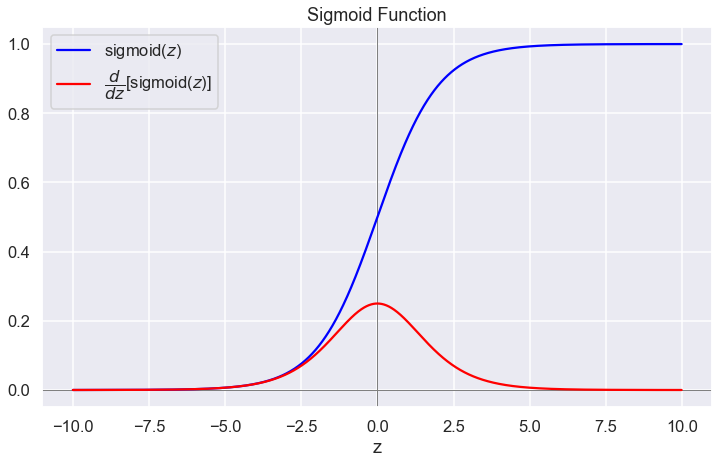

In [4]:
y = sigmoid(z)
dy = sigmoid(z, derivative=True)

fig, ax = plt.subplots(figsize = (12,7))
ax.axhline(color='gray', linewidth=1)
ax.axvline(color='gray', linewidth=1)
ax.plot(z, y, 'b', label=r'sigmoid($z$)')
ax.plot(z, dy, 'r', label=r'$\dfrac{d}{dz}$[sigmoid($z$)]')
ax.set(title='Sigmoid Function', xlabel=r'z')
ax.legend();

The plot above illustrates that:
* *for the sigmoid function, large negative values are mapped to near zero outputs but near zero inputs are NOT mapped to near zero outputs*
* *the sigmoid function approaches a linear transformation when the input is close to $0$*
* *the derivative of the sigmoid function reaches a maximum value of $0.25$ when the input is $0$*
* *the derivative of the sigmoid function approaches $0$ as the input diverges from $0$ in either direction*

### *Hyperbolic Tangent Function*

In [5]:
def tanh(z, derivative=False):
    f = np.tanh(z)
    if (derivative == True):
        return (1 - (f ** 2))
    return np.tanh(z)

> *The **hyperbolic tangent function** transforms its inputs, for which values lie in the domain $\mathbb{R}$, to outputs that lie on the interval $(-1, 1)$, that is, it accepts any input in the range $(-\infty, \infty)$ and squashes it down to some value in the range $(-1, 1)$.*
> $$ \large{\text{tanh}(z) = \dfrac{e^z - e^{-z}}{e^z + e^{-z}}} $$

> *The derivative of the hyperbolic tangent function is given by:*
> $$ \large{\dfrac{d}{dz}[\text{tanh}(z)] = 1 - \dfrac{(e^z - e^{-z})^2}{(e^z + e^{-z})^2}} = 1 - \text{tanh}^{2}(z)$$

*The hyperbolic tangent function and its derivative are plotted below.*

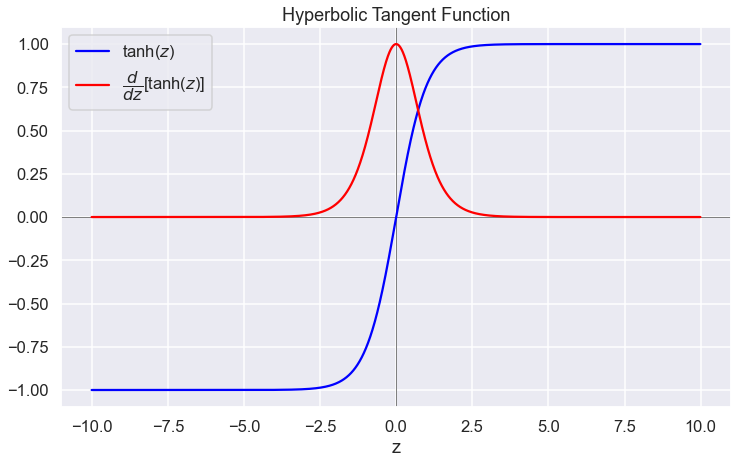

In [6]:
y = tanh(z)
dy = tanh(z, derivative=True)

fig, ax = plt.subplots(figsize = (12,7))
ax.axhline(color='gray', linewidth=1)
ax.axvline(color='gray', linewidth=1)
ax.plot(z, y, 'b', label=r'tanh($z$)')
ax.plot(z, dy, 'r', label=r'$\dfrac{d}{dz}$[tanh($z$)]')
ax.set(title='Hyperbolic Tangent Function', xlabel=r'z')
ax.legend();

The plot above illustrates that:
* *the shape of the hyperbolic tangent function is similar to that of the sigmoid function*
* *for the hyperbolic tangent function, large negative values are mapped to negative outputs and near zero inputs are mapped to near zero outputs*
* *the hyperbolic tangent function approaches a linear transformation when the input is close to $0$*
* *the hyperbolic tangent function exhibits point symmetry about the origin of the coordinate system*
* *the derivative of the hyperbolic tangent function reaches a maximum value of $1$ when the input is $0$*
* *the derivative of the hyerbolic tangent function approaches $0$ as the input diverges from $0$ in either direction*

### *The Vanishing Gradient Problem*

> *A disadvantage of both the sigmoid and hyperbolic tangent activation functions is that when the input grows very large or becomes very small, their derivatives approach $0$ and therefore become exceedingly small. This causes gradient descent to slow down since the parameters are being updated by ever smaller magnitudes. The following activation functions attempt to overcome this issue. This is known as the __vanishing gradient__ problem.*

### *Inverse Tangent Function* 


The inverse tangent (arctan) function has a lot of the same qualities that tanh has, but the range roughly goes from -1.6 to 1.6, and  the slope is more gentle than the one we saw using the tanh function.

In [7]:
def arctan(z, derivative=False):
    if (derivative == True):
        return 1/(1+np.square(z))
    return np.arctan(z)

> *The **inverse tangent function** transforms its inputs, for which values lie in the domain $\mathbb{R}$, to outputs that lie on the interval $(-\dfrac{\pi}{2}, \dfrac{\pi}{2})$, that is, it accepts any input in the range $(-\infty, \infty)$ and squashes it down to some value in the range $(-\dfrac{\pi}{2}, \dfrac{\pi}{2})$:*
> $$ \large{\text{arctan}(z)} $$

> *The derivative of the inverse tangent function is given by:*
> $$ \large{\dfrac{d}{dz}[\text{arctan}(z)] = 1 + (\text{arctan}(z))^2} $$

*The inverse tangent function and its derivative are plotted below.*

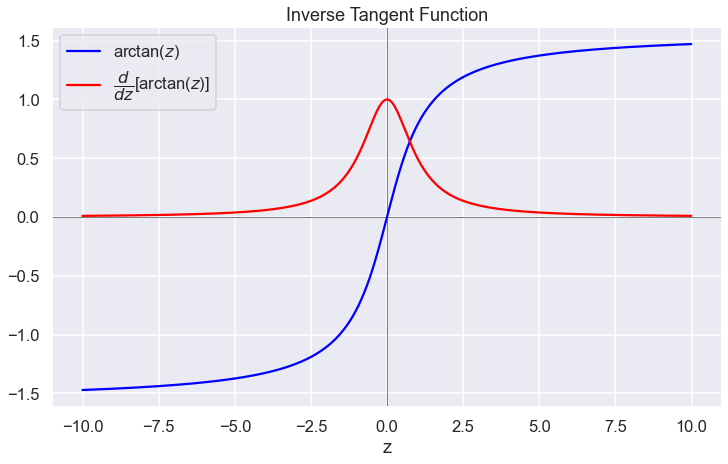

In [8]:
y = arctan(z)
dy = arctan(z, derivative = True)

fig, ax = plt.subplots(figsize = (12,7))
ax.axhline(color='gray', linewidth=1)
ax.axvline(color='gray', linewidth=1)
ax.plot(z, y, 'b', label=r'arctan($z$)')
ax.plot(z, dy, 'r', label=r'$\dfrac{d}{dz}$[arctan($z$)]')
ax.set(title='Inverse Tangent Function', xlabel=r'z')
ax.legend();

The plot above illustrates that:
* *the graph of the inverse tangent function is slightly flatter than the inverse tangent function, allowing it to better differentiate between similar input values*
* *for the inverse tangent function, large negative inputs are mapped to negative outputs and near zero inputs are mapped to near zero outputs*
* *the inverse tangent function approaches a linear transformation when the input is close to $0$*
* *the inverse tangent function exhibits point symmetry about the origin of the coordinate system*
* *the derivative of the inverse tangent function reaches a maximum value of $1$ when the input is $0$*
* *the derivative of the inverse tangent function approaches $0$ as the input diverges from $0$ in either direction, however, it approaches $0$ more slowly than the sigmoid and hyperbolic tangent functions, which reduces the prolem of vanishing gradients*

### *Rectified Linear Unit (ReLU) Function* 

In [9]:
def relu(z, derivative=False):
    f = np.zeros(len(z))
    if (derivative == True):
        for i in range(0, len(z)):
            if z[i] > 0:
                f[i] = 1  
            else:
                f[i] = 0
        return f
    for i in range(0, len(z)):
        if z[i] > 0:
            f[i] = z[i]  
        else:
            f[i] = 0
    return f

> *The **rectified linear unit (ReLU) function** is the most popular activation function, due to its simplicity and its good performance on a variety of predictive tasks. It accepts any input in the range $(-\infty, \infty)$ and returns the maximum of this input and $0$:*
> $$ \large{\text{ReLU}(z) = 
> \begin{cases}
>     0, & z \leq 0 \\
>     z, & z \gt 0
> \end{cases}} $$

  
> *The derivative of the rectified linear unit function is given by:*
> $$ \large{\dfrac{d}{dz}[\text{ReLU}(z)] =  
> \begin{cases}
>     0, & z \leq 0 \\
>     1, & z \gt 0
> \end{cases}} $$ 

*The rectified linear unit function and its derivative are plotted below.*

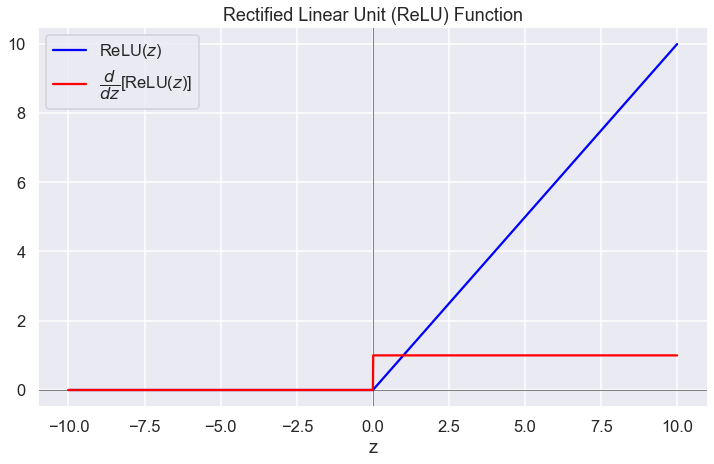

In [10]:
y = relu(z)
dy = relu(z, derivative=True)

fig, ax = plt.subplots(figsize = (12,7))
ax.axhline(color='gray', linewidth=1)
ax.axvline(color='gray', linewidth=1)
ax.plot(z, y, 'b', label=r'ReLU($z$)')
ax.plot(z, dy, 'r', label=r'$\dfrac{d}{dz}$[ReLU($z$)]')
ax.set(title='Rectified Linear Unit (ReLU) Function', xlabel=r'z')
ax.legend();

The plot above illustrates that:
* *the ReLU function retains only positive elements and discards all negative elements by setting their corresponding activation to $0$*
* *the derivative of the ReLU function is $0$ when the input is negative, and $1$ when the input is positive*
* *the derivative of the ReLU function is not differentiable when the input takes a value precisely equal to $0$*
* *the derivative of the ReLU function either vanishes or simply lets the argument through, which mitigates the problem of vanishing gradients*

### *The Dying ReLU Problem*

> *The **dying ReLU problem** refers to the scenario when many ReLU neurons only output a value of $0$ due to their inputs being in the negative range. When a ReLU neuron returns an output of $0$, the resulting gradient is also $0$. This means that the gradients of ReLU neurons fail to flow during backpropagation, and the network weights are not updated. Ultimately, a large part of the network becomes inactive, and is unable to learn further.* 

The dying ReLU problem is primarily caused by two factors:

- *__High Learning Rate:__* -- Updating the weight during backpropagation is given by: $$ w^* = w - \alpha \dfrac{\partial J}{\partial w} $$ If the learning rate ($\alpha$) is set too high, the old weight is subtracted by too large a number, resulting in the updated weight becoming a negative number. This updated weight results in a negative input for ReLU neurons in the next layer, thereby causing the dying ReLU problem to occur.

- *__Large Negative Bias__* -- The input to the activation function is given by: $$ z = w^T x + b $$ A large negative bias term ($b$) can cause the ReLU activation input to become negative. This, results in a negative input for the ReLU activation function of the current neuron, thereby causing the dying ReLU problem to occur.

### *Leaky Rectified Linear Unit (LReLU) Function*

In [11]:
def leaky_relu(x, leakage = 0.05, derivative=False):
    f = np.zeros(len(x))
    if (derivative == True):
        for i in range(0, len(x)):
            if x[i] > 0:
                f[i] = 1  
            else:
                f[i] = leakage
        return f
    for i in range(0, len(x)):
        if x[i] > 0:
            f[i] = x[i]  
        else:
            f[i] = x[i] * leakage
    return f

> *The **leaky rectified linear unit (LReLU) function** is a variation of the ReLU activation function that solves the dying ReLU problem by allowing for a small negative gradient ($\beta$) when $z < 0$:*
> $$ \large{\text{LReLU}(z) = \max(\beta z, z)} $$

> *The derivative of the rectified linear unit function is given by:*
> $$ \large{\dfrac{d}{dz}[\text{LReLU}(z)] = \max(\beta,1)} $$

*The leaky rectified linear unit function and its derivative are plotted below.*

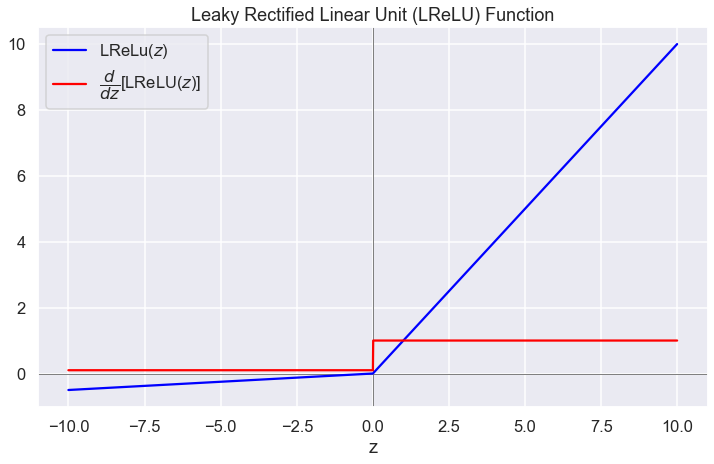

In [12]:
y = leaky_relu(z)
dy = leaky_relu(z, leakage=0.1, derivative=True)

fig, ax = plt.subplots(figsize = (12,7))
ax.axhline(color='gray', linewidth=1)
ax.axvline(color='gray', linewidth=1)
ax.plot(z, y, 'b', label=r'LReLu($z$)')
ax.plot(z, dy, 'r', label=r'$\dfrac{d}{dz}$[LReLU($z$)]')
ax.set(title='Leaky Rectified Linear Unit (LReLU) Function', xlabel=r'z')
ax.legend();

The plot above illustrates that:
* *the LReLU function maps positive inputs to positive outputs of the same magnitude and negative inputs to negative outputs of a smaller magnitude*
* *the derivative of the LReLU function is $\beta$ when the input is negative, and $1$ when the input is positive*
* *the derivative of the LReLU function is not differentiable when the input takes a value precisely equal to $0$*
* *the derivative of the LReLU function is prone to the problem of vanishing gradients when the input is negative*